# **AI Virtual Career Counsellor**

## Naive Bayes

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from google.colab import files

In [2]:
# Load the cleaned dataset
url = "https://raw.githubusercontent.com/SiddardhaShayini/Career-Recommender-Dataset/refs/heads/main/dataset/cleaned_dataset.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Drawing,Dancing,Singing,Sports,Video_Game,Acting,Travelling,Gardening,Animals,Photography,...,Doctor,Pharmisist,Cycling,Knitting,Director,Journalism,Bussiness,Listening_Music,Courses,Career_Options
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."


In [4]:
#  Encode the target labels (Courses)
le = LabelEncoder()
df['Courses_Encoded'] = le.fit_transform(df['Courses'])

In [5]:
# Split features and target
X = df.drop(['Courses', 'Career_Options', 'Courses_Encoded'], axis=1)
y = df['Courses_Encoded']

In [6]:
# Shuffle and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [7]:
# Train Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predict
y_pred = model_nb.predict(X_test)

In [9]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=le.transform(le.classes_), target_names=le.classes_)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [10]:
# Regression-style error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [11]:
# Print Metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nError Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Accuracy: 0.99

Classification Report:
                                                      precision    recall  f1-score   support

                 Animation, Graphics and Multimedia       1.00      1.00      1.00        24
                   B.Arch- Bachelor of Architecture       1.00      1.00      1.00        19
                        B.Com- Bachelor of Commerce       1.00      0.83      0.91        18
                                              B.Ed.       1.00      1.00      1.00        22
                                B.Sc Bioinformatics       0.00      0.00      0.00         0
                                      B.Sc Genetics       0.00      0.00      0.00         0
                                 B.Sc Healthcare IT       0.00      0.00      0.00         0
                        B.Sc Medical Lab Technology       0.00      0.00      0.00         0
                              B.Sc- Applied Geology       1.00      1.00      1.00        19
                             

### **Naive Bayes Career Prediction – Analysis Report**

#### **Model Summary**

* **Algorithm**: Gaussian Naive Bayes
* **Dataset**: `cleaned_dataset.csv` (Career Recommendation)
* **Input Features**: 59 binary-coded interests
* **Target**: `Courses` (mapped to numerical classes)

---

#### **Classification Performance**

* **Accuracy**: **99%**
* **Weighted Avg F1-Score**: **0.99**
* **Macro Avg F1-Score**: **0.77**

*Most courses were perfectly predicted with high precision and recall.*

*Some courses (like `B.Sc Bioinformatics`, `B.Tech in AI`, etc.) had **zero support**, meaning they were not present in the test set, so metrics are undefined for them.*

---

#### **Regression-Style Error Metrics**

| Metric   | Value |
| -------- | ----- |
| MSE      | 3.33  |
| RMSE     | 1.82  |
| MAE      | 0.12  |
| R² Score | 0.98  |

These low error values suggest the model predictions are **very close to true values** numerically, although classification metrics are more relevant here.

---

#### **Confusion Matrix Insights**

* The diagonal dominance indicates **correct classification across nearly all categories**.
* **Very few misclassifications** occurred, and primarily in **low-frequency courses**.

---

#### **Conclusion**

* **Naive Bayes** performed **exceptionally well** on this dataset.
* It’s lightweight and interpretable—ideal for real-time recommendation use.
* Ensure **sufficient samples for all course categories** to avoid "0 support" issues in test data.



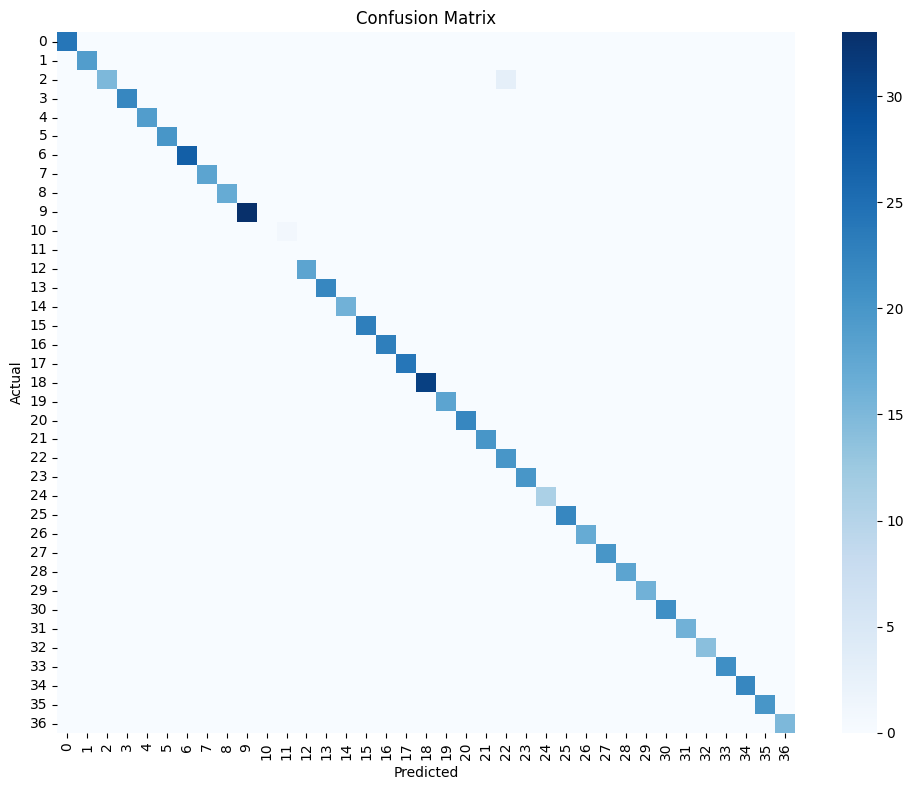

In [12]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, cmap='Blues', fmt='g')
plt.title('')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [13]:

# Save and download the model and encoder
joblib.dump(model_nb, 'naive_bayes_model.pkl')
files.download('naive_bayes_model.pkl')

joblib.dump(le, 'label_encoder_nb.pkl')
files.download('label_encoder_nb.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>